<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
(train_img, train_lab),(_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
classes =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
test_img.shape

(10000, 28, 28)

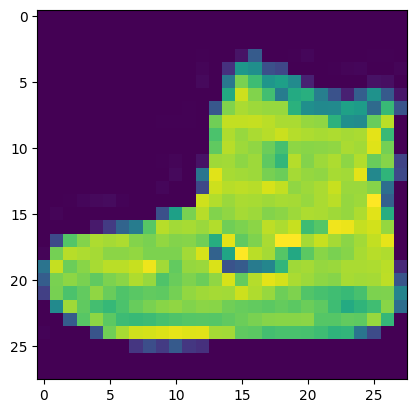

In [ ]:
plt.imshow(train_img[0])

In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

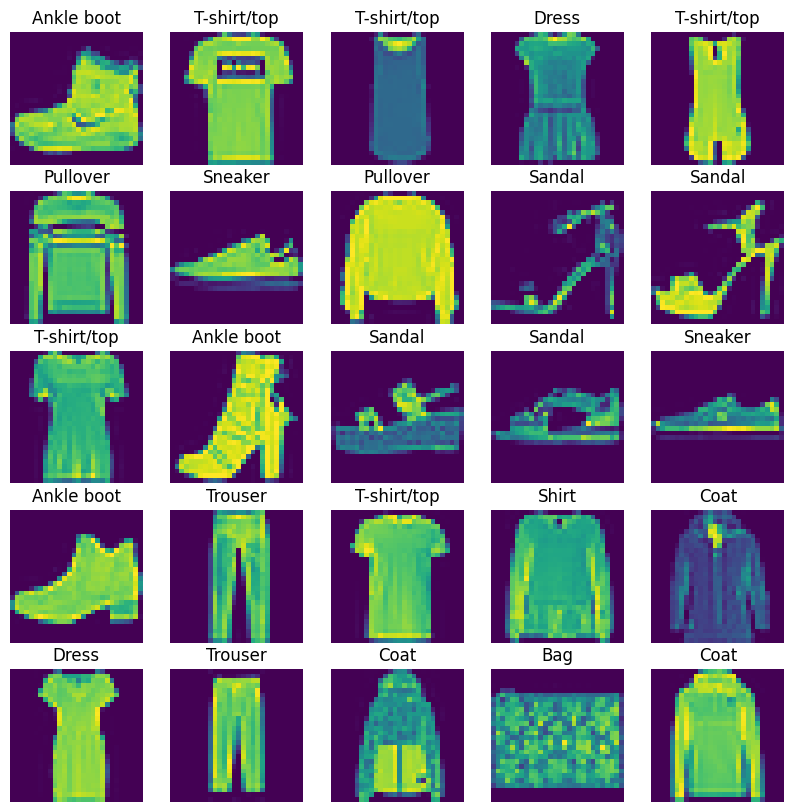

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_img[i])
  plt.title(classes[train_lab[i]])
  plt.axis("off")
plt.show()

In [ ]:
classes[train_lab[6]]

'Sneaker'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)
    ])

In [ ]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"])

In [ ]:
model.fit(train_img, train_lab, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.5043 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3408 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3164 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2818 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2700 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2481 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [ ]:
loss, accuracy = model.evaluate(test_img, test_lab)
print("losses :::::", loss)
print("accuracy ::::::", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8847
losses ::::: 0.3289686441421509
accuracy :::::: 0.8847000002861023


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
pred = probability_model.predict(test_img)

313/313 [==============================] - 1s 1ms/step


In [ ]:
pred[0]

array([1.6811487e-08, 1.9636373e-08, 7.3529247e-07, 3.2472478e-09,
       9.2215515e-09, 7.6510194e-05, 5.2898514e-08, 5.3914334e-03,
       1.8476138e-08, 9.9453121e-01], dtype=float32)

In [ ]:
np.argmax(pred[0])

9

In [ ]:
test_lab[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

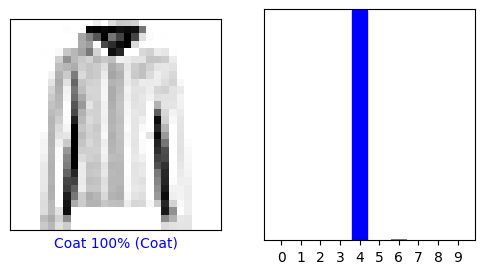

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred[i],test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i], test_lab)
plt.show()

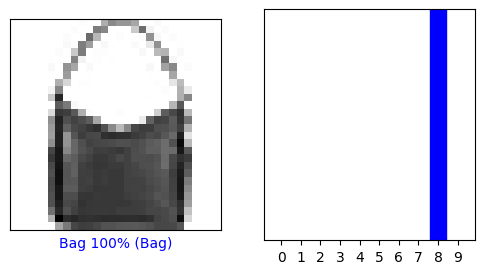

In [ ]:
i = 34
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()

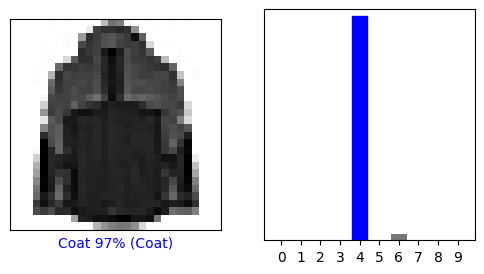

In [ ]:
i = 340
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()

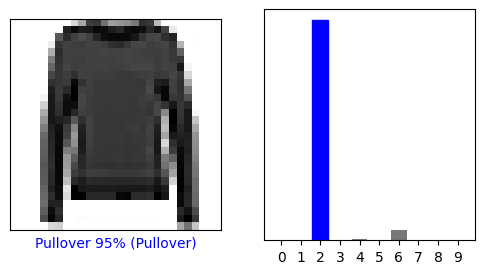

In [ ]:
i = 99
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()

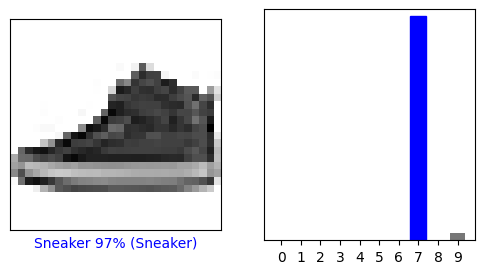

In [ ]:
i = 167
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()

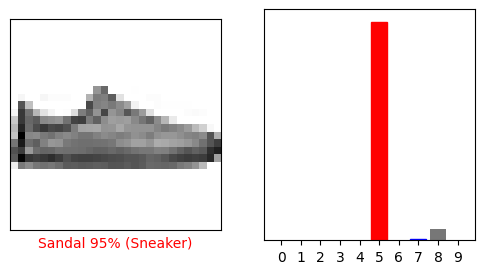

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()

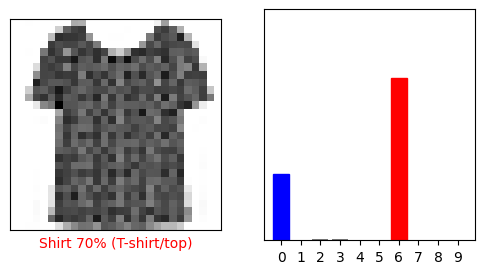

In [ ]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_lab, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_lab)
plt.show()